In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv(r'C:\Users\Radhika\Downloads\FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [9]:
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


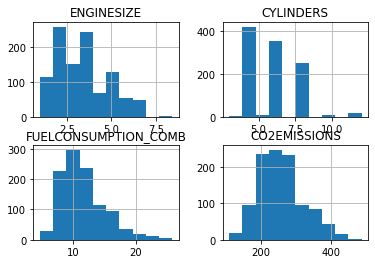

In [10]:
visual=cdf.hist()
plt.show()

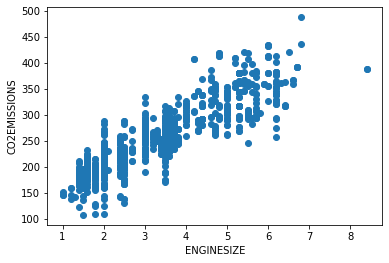

In [14]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

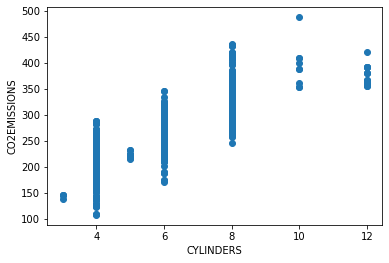

In [18]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS)
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

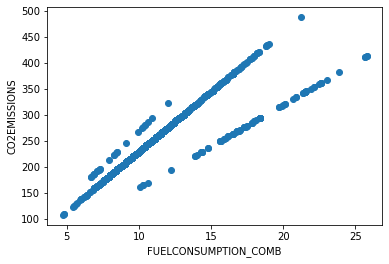

In [21]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [38]:
mask=np.random.rand(len(cdf))<0.8

array([ True,  True,  True, ...,  True,  True,  True])

In [40]:
train=cdf[mask]
test=cdf[~mask]
train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


In [42]:
test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
11,3.5,6,10.4,239
16,4.7,8,14.7,338
18,5.9,12,15.6,359
19,2.0,4,8.8,202
29,3.0,6,8.3,224
...,...,...,...,...
1015,1.8,4,8.7,200
1017,2.0,4,9.4,216
1028,3.6,6,12.3,283
1057,2.5,5,10.1,232


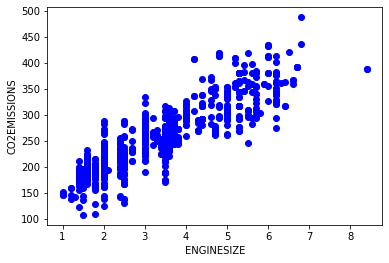

In [46]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [50]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)

LinearRegression()

In [52]:
print("coefficients",regr.coef_)
print("intercept",regr.intercept_)

coefficients [[39.40106882]]
intercept [124.52393827]


Text(0, 0.5, 'CO2EMISSIONS')

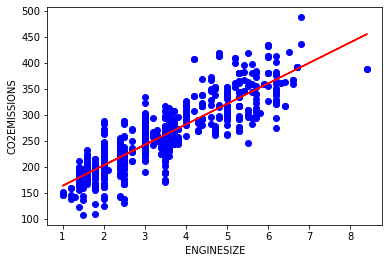

In [57]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.plot(train_x,regr.intercept_[0]+regr.coef_[0]*train_x)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")

In [65]:
from sklearn.metrics import r2_score

test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
test_y_=regr.predict(test_x)

In [70]:
print("mean absolute error:%.2f" % np.mean(np.absolute(test_y_-test_y)))

mean absolute error:24.09


In [72]:
print("residual sum of squares:%.2f" % np.mean((test_y_-test_y)**2))

residual sum of squares:933.22


In [73]:
print("r2_score:%.2f" % r2_score(test_y,test_y_))

r2_score:0.75
